In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
#tf.enable_eager_execution()
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(65)
np.random.seed(21)

2022-07-18 21:42:44.982569: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout

In [3]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


2022-07-18 21:42:46.212619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-18 21:42:46.243811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 21:42:46.248521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 21:42:46.248722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

In [4]:
df = pd.read_csv(r'../Data/WeeklyF.csv')

In [5]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['Year']= pd.DatetimeIndex(df['Date']).year

In [6]:
df.describe()

,Failure Rate,Temp,Rain,month,Year
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,13.697674,29.803087,0.396749,6.345515,2018.395349
std,7.681469,5.997938,1.283896,3.402972,1.667287
min,1.000000,19.298571,0.000000,1.000000,2016.000000
25%,9.000000,24.165714,0.000000,3.000000,2017.000000
50%,12.000000,30.867143,0.000000,6.000000,2018.000000
75%,17.000000,35.587143,0.114286,9.000000,2020.000000
max,60.000000,39.292857,14.285714,12.000000,2021.000000


In [7]:

validate = df[df['Year'] != 2016][['Failure Rate','Temp']]
#df.drop(df['Failure Rate'].tail(10).index,inplace=True)

In [8]:
uni_data = df[['Failure Rate','Temp']]
uni_data.index = df['Date']
uni_data.head()

,Failure Rate,Temp
Date,,
1/3/2016,1,22.224286
1/10/2016,17,21.480000
1/17/2016,9,20.708571
1/24/2016,8,20.581429
1/31/2016,8,21.034286


In [9]:
#uni_data = uni_data.values
scaler_x = preprocessing.MinMaxScaler()
x_rescaled = scaler_x.fit_transform(uni_data)


In [10]:
def data_prep(dataset, start, end, window, horizon):
  X = []
  y = []

  start = start + window
  if end is None:
    end = len(dataset) - horizon

  for i in range(start, end):

    indicesx = range(i-window, i)
    X.append(np.reshape(dataset[indicesx,:], (window, 2)))

    indicesy = range(i,i+horizon)
    y.append(dataset[indicesy,0])
  return X, y

In [11]:
Nrows=df.count()[0]

In [12]:
univar_hist_window = 52
horizon = 4
TRAIN_SPLIT = Nrows-horizon
x_train, y_train = data_prep(x_rescaled, 0, TRAIN_SPLIT,univar_hist_window, horizon)
#x_val_uni, y_val_uni = custom_ts_univariate_data_prep(x_rescaled, TRAIN_SPLIT, None,univar_hist_window,horizon)

# 5-Fold Cross Validation

(53, 52, 2)
(53, 4)
(192, 52, 2)
(192, 4)


2022-07-18 21:42:51.541593: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 21:42:51.541796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 21:42:51.541885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 21:42:51.542227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 21:42:51.542330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

Epoch 233: early stopping


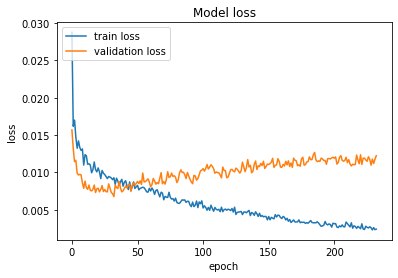

1/1 [==============================] - 0s 10ms/step
(52, 52, 2)
(52, 4)
(193, 52, 2)
(193, 4)
Epoch 266: early stopping


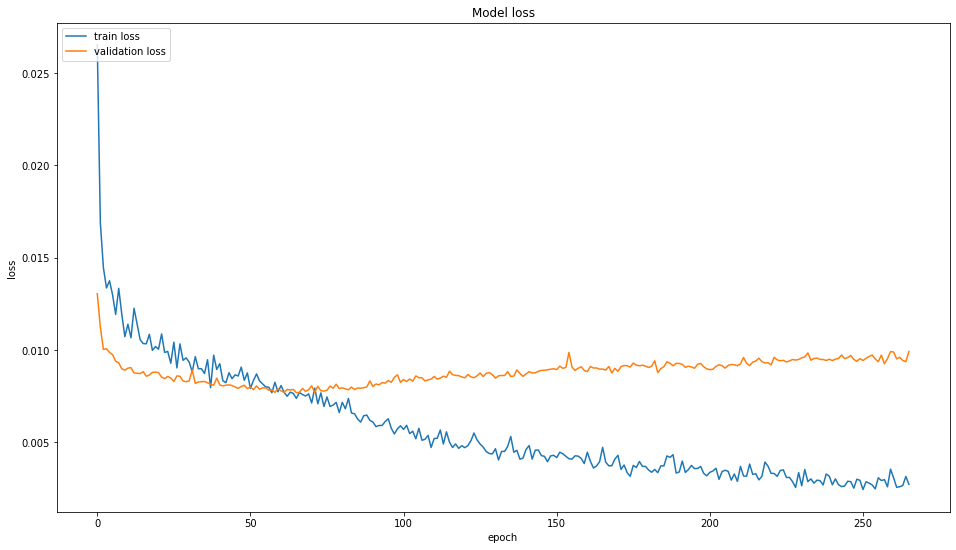

1/1 [==============================] - 0s 11ms/step
(52, 52, 2)
(52, 4)
(193, 52, 2)
(193, 4)
Epoch 229: early stopping


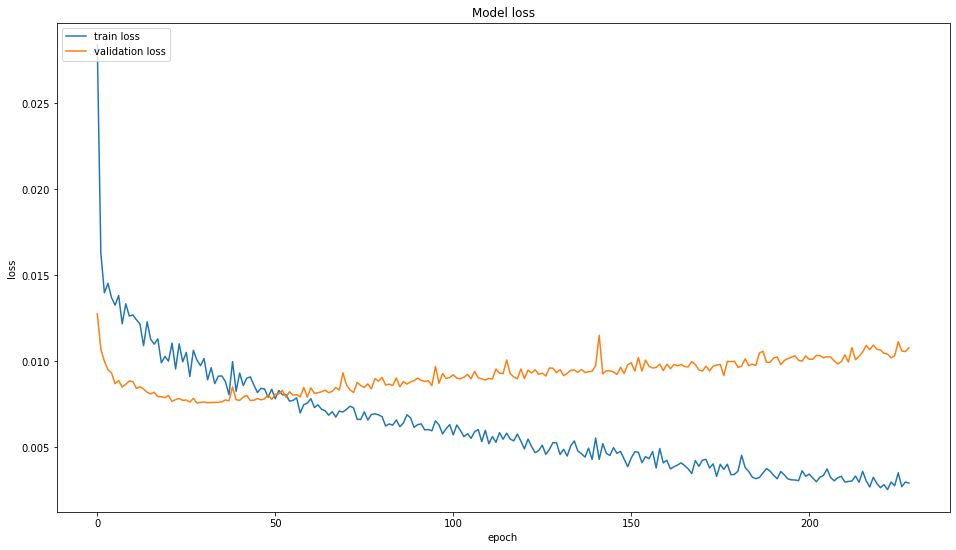

1/1 [==============================] - 0s 10ms/step
(52, 52, 2)
(52, 4)
(193, 52, 2)
(193, 4)
Epoch 283: early stopping


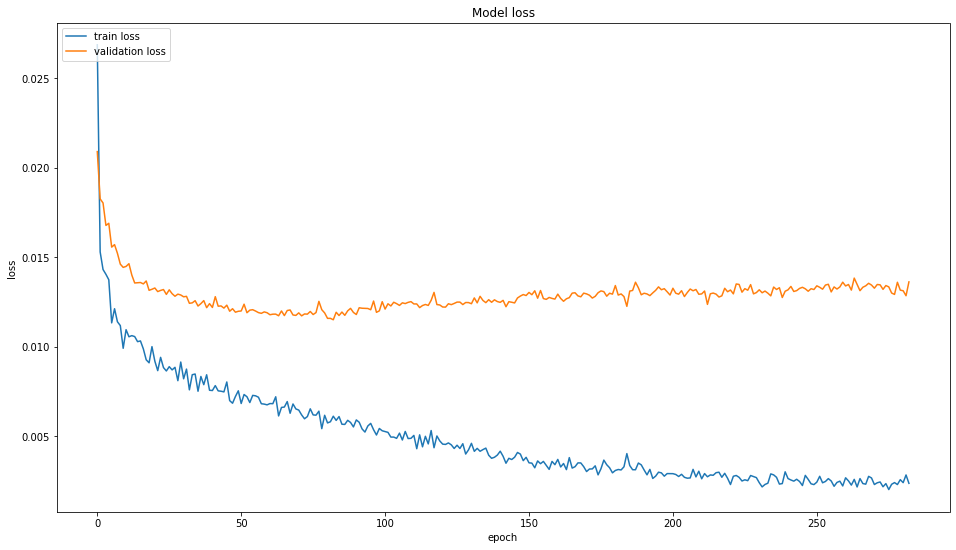

1/1 [==============================] - 0s 19ms/step
(36, 52, 2)
(36, 4)
(209, 52, 2)
(209, 4)
Epoch 411: early stopping


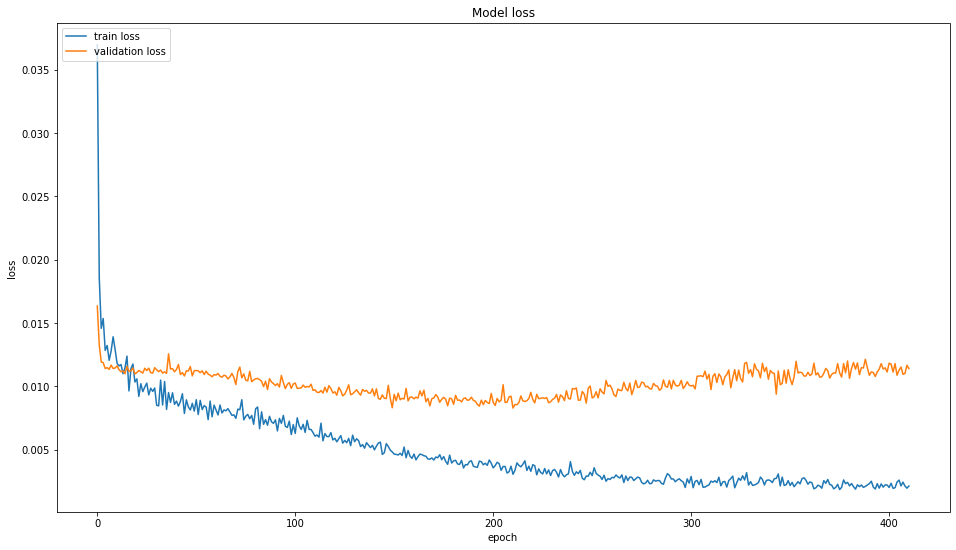

1/1 [==============================] - 0s 17ms/step


In [14]:
years=[2017,2018,2019,2020,2021]
split_st=[0,53,105,157,209]#,249
split_end=[53,105,157,209,249]
Pred = []
for i in range(5):
    y=years[i]
    st=split_st[i]
    end=split_end[i]
    
    v_rescaled= x_rescaled[st+52:end+52]
    x_val_multi =np.asarray(x_train[st:end])
    y_val_multi =np.asarray(y_train[st:end])
    x_train_multi =np.asarray(x_train[:st]+x_train[end:])
    y_train_multi =np.asarray(y_train[:st]+y_train[end:])
    y_train_multi=y_train_multi.reshape(-1,horizon)
    y_val_multi=y_val_multi.reshape(-1,horizon)
    
    BATCH_SIZE = 16
    BUFFER_SIZE = 64
    print(x_val_multi.shape)
    print(y_val_multi.shape)
    print(x_train_multi.shape)
    print(y_train_multi.shape)
    train_univariate = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
    train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

    val_univariate = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
    val_univariate = val_univariate.batch(BATCH_SIZE).repeat()
    
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(x_train_multi.shape[1], x_train_multi.shape[2])))
    model.add(MaxPool1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(30, activation='softmax'))
    model.add(Dropout(0.2))
    model.add(Dense(horizon))
    model.compile(optimizer='adam', loss='mse')
    model_path = r'../Models/Bi__LSTM_FWTemp_excluding_{}.h5'.format(y)
    EVALUATION_INTERVAL = 20
    EPOCHS = 500
    P=EPOCHS*0.4
    history = model.fit(train_univariate, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_univariate, validation_steps=50,verbose =0,
                             callbacks =[tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=P, verbose=1, mode='min'),tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])
    
    # Recreate the exact same model, including its weights and the optimizer
    Trained_model = tf.keras.models.load_model(model_path)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss', 'validation loss'], loc='upper left')
    plt.rcParams["figure.figsize"] = [16,9]
    plt.show()
    
    
    uni = df[df['Year']==y-1][['Failure Rate','Temp']]
    validatehori = uni.tail(univar_hist_window)
    #validatehist = validatehori.values
    result = []
    # Define Forecast length here
    window_len = end-st
    val_rescaled= scaler_x.fit_transform(validatehori)

    for i in range(1, window_len+1):
    
        val_rescaled = val_rescaled.reshape((1, univar_hist_window, 2))
        Predicted_results = Trained_model.predict(val_rescaled)
        #print(val_rescaled.shape)
        #print(f'predicted : {Predicted_results}')
        result.append(Predicted_results[0][0])
        val_rescaled = np.append(val_rescaled[:,1:],[[v_rescaled[i-1,:]]])
        val_rescaled = val_rescaled.reshape((1, univar_hist_window, 2))
        #print(val_rescaled)
    res_arr = np.asarray(result)
    res=np.zeros((window_len,2))
    res[:,0]=res_arr.reshape(-1)
    result_inv_trans = scaler_x.inverse_transform(res)
    Pred.extend(result_inv_trans[:,0])
    
    
    
    

In [15]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [16]:
timeseries_evaluation_metrics_func(np.asarray(validate['Failure Rate']),Pred)

Evaluation metric results:-
MSE is : 37.575430803696364
MAE is : 4.3831124326371285
RMSE is : 6.129880162262258
MAPE is : 37.34308610640113
R2 is : 0.27252035311134726



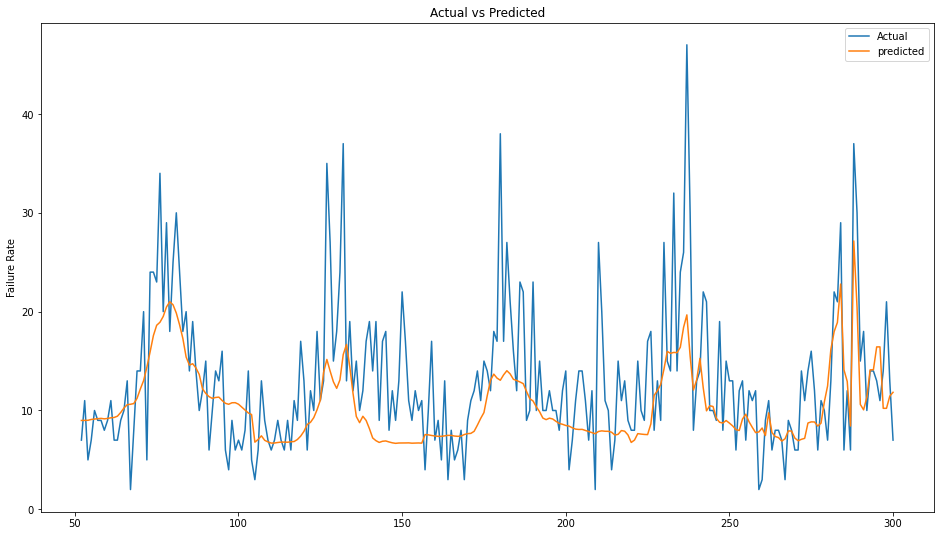

In [17]:
plt.plot(list(validate.index) ,list(validate['Failure Rate']))
plt.plot( list(validate.index),list(Pred))
plt.title("Actual vs Predicted")
plt.ylabel("Failure Rate")
plt.legend(('Actual','predicted'))
plt.show()